In [1]:
import pandas as pd
import numpy as np

# Load the dataset into a DataFrame

In [3]:
url = 'https://raw.githubusercontent.com/edaehn/python_tutorials/main/titanic/train.csv'
titanic_df = pd.read_csv(url)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Handle missing values

In [5]:
df_preprocesed = titanic_df.fillna(titanic_df.mean())

<ipython-input-5-0a726fe7e3aa>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_preprocesed = titanic_df.fillna(titanic_df.mean())


In [6]:
df_preprocesed.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature engineering

In [7]:
df_preprocesed["AgeRange"] = df_preprocesed["Age"].apply(lambda x: "Child" if x < 18 else "Adult")

In [9]:
df_preprocesed.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Child


# Encoding categorical variables

In [10]:
df_preprocesed = pd.get_dummies(df_preprocesed, columns=["Sex", "Embarked"])
df_preprocesed.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeRange,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Adult,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Adult,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Adult,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Adult,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Adult,0,1,0,0,1


# Feature selection

In [11]:
df_preprocesed = df_preprocesed.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [12]:
df_preprocesed.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeRange,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,Adult,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,Adult,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,Adult,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,Adult,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Adult,0,1,0,0,1


# Splitting the data into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
X = df_preprocesed.drop("Survived", axis=1)
y = df_preprocesed["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,AgeRange,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,Adult,0,1,0,0,1
733,2,23.0,0,0,13.0000,Adult,0,1,0,0,1
382,3,32.0,0,0,7.9250,Adult,0,1,0,0,1
704,3,26.0,1,0,7.8542,Adult,0,1,0,0,1
813,3,6.0,4,2,31.2750,Child,1,0,0,0,1


In [16]:
y_train.head(10)

331    0
733    0
382    0
704    0
813    0
118    0
536    0
361    0
29     0
55     1
Name: Survived, dtype: int64

# Accuracy score

In [17]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of the model
def print_accuracy_score(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: ", accuracy)

# Prepare our data for ML tests

In [19]:
from sklearn.model_selection import train_test_split

# Disabling chained assignments to avoid the SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Removing the NaN values
cleaned_titanic_df = titanic_df.dropna()

# Selecting feature and target columns
X = cleaned_titanic_df[['Pclass', 'Age', 'Fare', 'Sex']]
y = cleaned_titanic_df['Survived']

# Converting the Sex column to a numerical value (0 for male, 1 for female)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.head()

,Pclass,Age,Fare,Sex
871,1,47.0,52.5542,1
484,1,25.0,91.0792,0
462,1,47.0,38.5000,0
3,1,35.0,53.1000,1
512,1,36.0,26.2875,0


In [21]:
y_train.head()

871    1
484    1
462    0
3      1
512    1
Name: Survived, dtype: int64

# Machine Learning tests

## Logistic Regression

In [24]:
# Importing the Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialising the model
logistic_regression = LogisticRegression()

# Fitting the model to the training data
logistic_regression.fit(X_train, y_train)

# Predicting the target variable using the test data
y_pred = logistic_regression.predict(X_test)

In [25]:
print("Predicted \tTest Value")
for predicted, test in zip(y_pred[:7], y_test[:7]):
  print(f"{predicted} \t\t\t{test}")

Predicted 	Test Value
0 			0
1 			0
1 			0
0 			0
1 			1
0 			0
1 			1


In [26]:
print_accuracy_score(y_test, y_pred)

Accuracy:  0.8108108108108109


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
clf = RandomForestClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = clf.predict(X_test)

In [28]:
print_accuracy_score(y_test, y_pred)

Accuracy:  0.9459459459459459


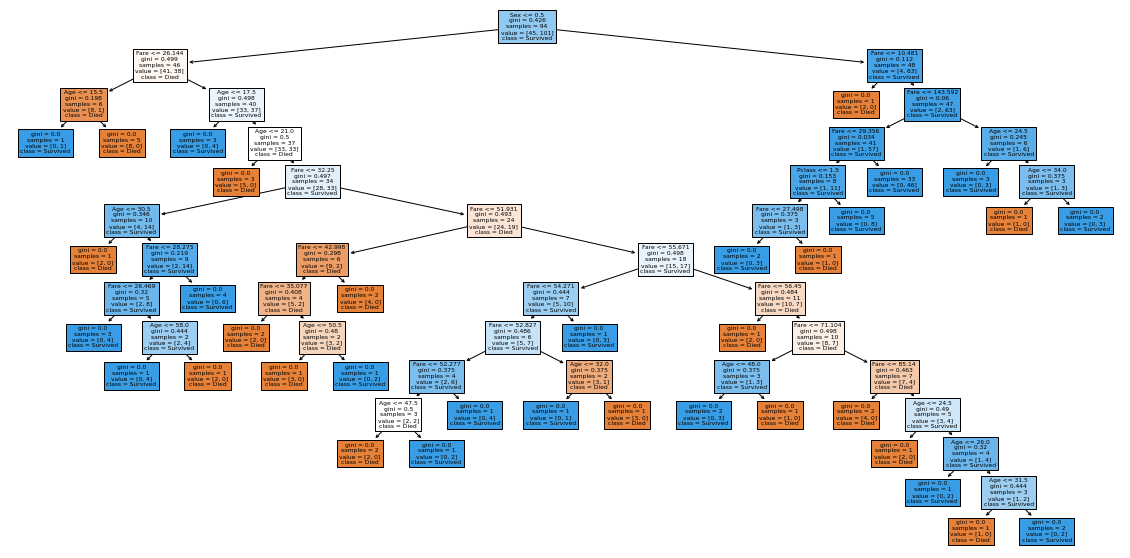

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot a single decision tree
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], feature_names=X_train.columns, class_names=['Died','Survived'], filled=True);
plt.show()

In [38]:
clf.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=1892457803)

## Neural Network

In [30]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2, activation='relu', input_shape=[4]),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test set
predictions = model.predict(X_test)

# Flatten the predictions array into a 1-dimensional array
predictions = predictions.ravel()

Epoch 1/10
5/5 [==============================] - 1s 5ms/step - loss: 11.0501 - accuracy: 0.4658
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 10.7817 - accuracy: 0.4726
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 10.5099 - accuracy: 0.4726
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 10.2427 - accuracy: 0.4795
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 9.9877 - accuracy: 0.4863
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 9.7290 - accuracy: 0.4863
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 9.4801 - accuracy: 0.4863
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 9.2421 - accuracy: 0.4863
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 8.9904 - accuracy: 0.4932
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 6.5395 - accuracy: 0.6486
Test accuracy: 0.6486486196517944
